<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/costa_rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [50]:
install.packages("ggalluvial")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lazyeval’




In [45]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)
library(ggsankey)

In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9fbd485b94426643624c19081d1a1d66&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbkF4SUN6VGpGZ0lHYWg5OGpSRzBib0x0NExKMGtaSFpYcnNfdFdRdU9HcE5tVUZ3ZUhGNFk5WGZ0ZHdDeTNodyIsInN0YXRlIjoiOWZiZDQ4NWI5NDQyNjY0MzYyNGMxOTA4MWQxYTFkNjYifQ==


In [7]:
# https://drive.google.com/file/d/1LjaFrCAoY56gjmDICQdCPhiXnNAzizTw/view?usp=drive_link
drive_download(file = as_id('1LjaFrCAoY56gjmDICQdCPhiXnNAzizTw'), path =  '/content/limon_22_23.tif', overwrite = TRUE)
limon_22_23_tif <- stack('/content/limon_22_23.tif')

File downloaded:

• CostaRica_Average_Land_Cover_Buffer_2000m_2022_to_2024.tif
  <id: 1LjaFrCAoY56gjmDICQdCPhiXnNAzizTw>

Saved locally as:

• /content/limon_22_23.tif



In [28]:
# https://drive.google.com/file/d/1LPW7FjMpZmRDirr78wFdSjd_ujZmEYMM/view?usp=drive_link
drive_download(file = as_id('1LPW7FjMpZmRDirr78wFdSjd_ujZmEYMM'), path =  '/content/limon_15_16.tif', overwrite = TRUE)
limon_15_16_tif <- stack('/content/limon_15_16.tif')

File downloaded:

• CostaRica_Average_Land_Cover_Buffer_2000m_2016_to_2018.tif
  <id: 1LPW7FjMpZmRDirr78wFdSjd_ujZmEYMM>

Saved locally as:

• /content/limon_15_16.tif



In [10]:
# https://drive.google.com/file/d/1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7/view?usp=sharing
drive_download(file = as_id('1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7'), path =  '/content/limon.gpkg', overwrite = FALSE)
limon_gpgk <- st_read('/content/limon.gpkg') %>% st_transform(st_crs(limon_22_23_tif))

File downloaded:

• limon.gpkg <id: 1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7>

Saved locally as:

• /content/limon.gpkg



Reading layer `limon' from data source `/content/limon.gpkg' using driver `GPKG'
Simple feature collection with 1 feature and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -83.94696 ymin: 9.07481 xmax: -82.55271 ymax: 10.93904
Geodetic CRS:  WGS 84


In [12]:
# https://drive.google.com/file/d/1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db/view?usp=drive_link
drive_download(file = as_id('1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db'), path =  '/content/park.gpkg', overwrite = FALSE)
park_gpgk <- st_read('/content/park.gpkg') %>% st_transform(st_crs(limon_22_23_tif))

File downloaded:

• park.gpkg <id: 1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db>

Saved locally as:

• /content/park.gpkg



Reading layer `park' from data source `/content/park.gpkg' using driver `GPKG'
Simple feature collection with 2 features and 0 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -83.39799 ymin: 10.07181 xmax: -83.15862 ymax: 10.35479
Geodetic CRS:  WGS 84


In [13]:
park_gpgk$names <- c('region','main')

In [29]:
raster_list <- list(
  limon_15_16_tif,
  limon_22_23_tif)

In [30]:
names(raster_list) <- c('y2016','y2022')

In [17]:
# ndvi_rast <-raster_list[[1]] %>% rast

# ndvi_dt <- exact_extract(ndvi_rast,park_gpgk,fun='mean')

Cannot preload entire working area of 84005660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [31]:
limon_15_16_class_tif <- which.max(limon_15_16_tif[[1:9]])
limon_22_23_class_tif <- which.max(limon_22_23_tif[[1:9]])

In [32]:
limon_15_16_class_tif %>% writeRaster('/content/limon_16_18_classed.tif',overwrite =T)
limon_22_23_class_tif %>% writeRaster('/content/limon_22_23_classed.tif',overwrite =T)

In [35]:
class_stack <- stack(limon_15_16_class_tif,limon_22_23_class_tif)

In [60]:
class_dt <- values(class_stack) %>% data.table
names(class_dt) <- c('y2018','y2023')
class_dt$row <- 1

In [64]:
classes <- c('water','trees','grass','flooded_vegetation','crops','scrub_shrub','built','bare','snow_and_ice')

In [74]:
pretty_labels <- c('Water','Forest','Grasslike-cover','Wetlands Vegetation','Crop-cover','Scrub/ Shrub','Developed','Bare','Snow and Ice')

In [75]:
class_dt[,class_y2018 := classes[y2018]]
class_dt[,class_y2023 := classes[y2023]]

class_dt[,pretty_class_y2018 := pretty_labels[y2018] %>% factor(levels=pretty_labels)]
class_dt[,pretty_class_y2023 := pretty_labels[y2023] %>% factor(levels=pretty_labels)]

In [79]:
# class_dt[!is.na(class_dt$y2018)][y2018!=y2023][,list(freq= sum(row)/nrow(class_dt)),by=.(y2018,y2023,pretty_class_y2018,pretty_class_y2023)]

In [107]:
color_scale = c(
'Water' ="#13dede",
'Forest' ="#33a02c",
'Grasslike-cover' ="#fecc5c",
'Wetlands Vegetation' = "#5c003d",
'Crop-cover' = "#bd0026",
'Scrub/ Shrub' ="#deab13",
'Developed' ="#297b8c",
'Bare' = '#5b5b5b',
'Snow and Ice'="#aa64ef" )

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


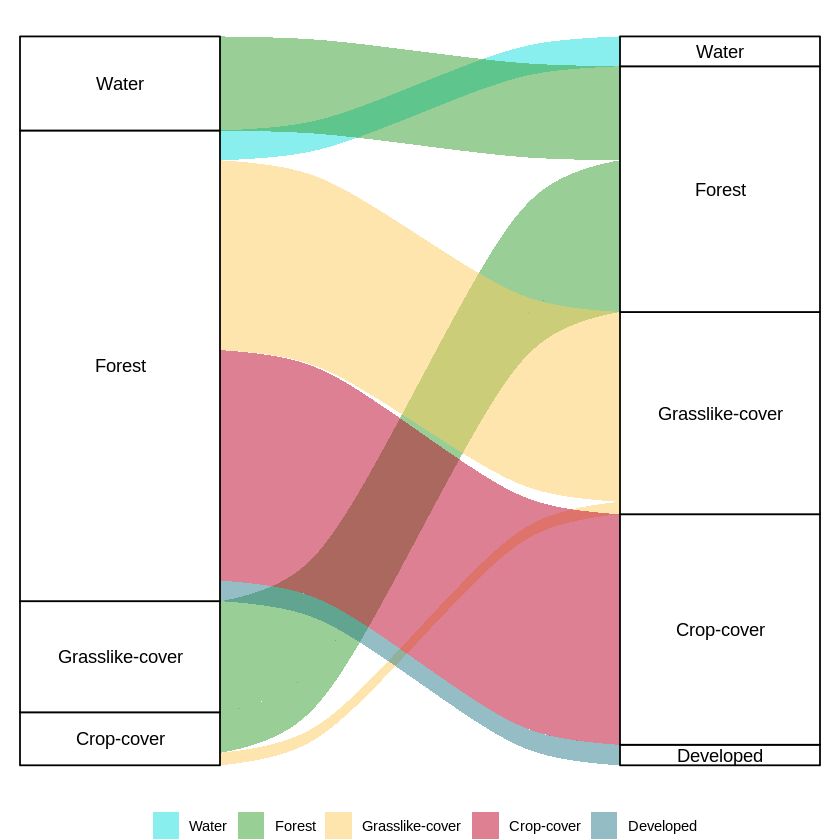

In [108]:
library(ggalluvial)
class_dt[!is.na(class_dt$y2018)][y2018!=y2023][,list(freq= sum(row)/nrow(class_dt)),by=.(y2018,y2023,pretty_class_y2018,pretty_class_y2023)][freq>0.0001] %>%

ggplot(data = .,
      aes(axis1 = pretty_class_y2018, axis2 = pretty_class_y2023, y = freq)) +
geom_alluvium(aes(fill = pretty_class_y2023)) +
scale_fill_manual(values = color_scale) +  # Using hex codes
geom_stratum() +
geom_text(stat = "stratum",
          aes(label = after_stat(stratum))) +
scale_x_discrete(limits = c("y2018", "y2023"),
                  expand = c(0.15, 0.05)) +
theme_void()+
theme(legend.position = "bottom") +  # Move legend to bottom
guides(color = guide_legend(title = NULL))  +
theme(legend.title = element_blank())  # Remove all legend titles


In [18]:
ndvi_mean_dt <-
raster_list %>%
  names %>%
  lapply(function(ndvi_names){


ndvi_rast <-raster_list[[ndvi_names]] %>% rast

ndvi_dt <- exact_extract(ndvi_rast,park_gpgk,fun='mean')
# ndvi_dt$names
ndvi_table <-
ndvi_dt %>%
  names %>%
  lapply(function(x){
    data.table(column = x,NDVI_mean = ndvi_dt[[x]],Name = park_gpgk$names)
  }) %>%
rbindlist()

ndvi_dt <- exact_extract(ndvi_rast,park_gpgk,fun='stdev')
# ndvi_dt$names
ndvi_sd_table <-
ndvi_dt %>%
  names %>%
  lapply(function(x){
    data.table(column = x,NDVI_sd = ndvi_dt[[x]],Name = park_gpgk$names)
  }) %>%
rbindlist()

ndvi_table$month <- ndvi_names
ndvi_table$NDVI_sd <- ndvi_sd_table$NDVI_sd
return(ndvi_table)
  }) %>%
    rbindlist()

Cannot preload entire working area of 84005660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 84005660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 84005660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 84005660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [19]:
ndvi_mean_dt[,year:=column %>% strsplit(.,'_') %>% lapply(function(x){x[[2]]}) %>% lapply(as.numeric)]
ndvi_mean_dt[,month:=month %>% factor(., levels= c('January','February','March','April','June','July','August','September', 'October','November','December'))]
ndvi_mean_dt[,month_i:=(month %>% as.numeric)]

ERROR: Error in x[[2]]: subscript out of bounds


In [ ]:
ndvi_mean_dt[,year_introduced := 0]
ndvi_mean_dt[Name=='Shoshone Tribe',year_introduced := 2015]
ndvi_mean_dt[Name== 'Buffalo Initiative',year_introduced := 2018]
ndvi_mean_dt[Name== 'T3000, Unassigned Leases',year_introduced := 2018]
ndvi_mean_dt[Name== 'Buffalo Initiative',year_introduced := 2020]

In [ ]:
# ndvi_mean_dt %>% head

In [ ]:
# Name=='Shoshone Tribe'
ndvi_mean_dt[Name=='Shoshone Tribe'] %>%
  ggplot(aes(x=month_i ,y=NDVI_mean))+
  geom_line(aes(group=year %>% paste,color=(year > 2014) %>% factor  ),alpha = 0.25 ) +
  # xlim(3,10)+
  geom_smooth(aes(color=(year > 2014) %>% factor ))+
  facet_wrap(Name~year_introduced)

In [ ]:
ndvi_mean_dt <- ndvi_mean_dt[order(month_i)]
ndvi_mean_dt[,accum_ndvi :=NULL]
ndvi_mean_dt[month_i>0 &month_i<13,  accum_ndvi := cumsum(NDVI_mean), by= .(Name,year %>% paste)]
# ndvi_mean_dt[,list(accum_ndvi=mean(accum_ndvi,na.rm=T)),by = .(month,year %>% paste,Name)][!is.na(accum_ndvi)]

In [ ]:
ndvi_mean_dt[ Name=='Wickstram Property' ] %>%
  ggplot(aes(x=month_i,y=accum_ndvi))+
  geom_line(aes(group=year %>% paste,color=(year > 2014) %>% factor ),alpha = 0.25) +
  geom_smooth(aes( color=(year > 2014) %>% factor ))+
  facet_wrap( ~year > 2014)